# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [12]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [13]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The ground staff were not h...
1,✅ Trip Verified | Second time BA Premium Econ...
2,Not Verified | They changed our Flights from ...
3,Not Verified | At Copenhagen the most chaotic...
4,✅ Trip Verified | Worst experience of my life...


In [14]:
df.shape

(1000, 1)

In [15]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [16]:
df

,reviews
0,✅ Trip Verified | The ground staff were not h...
1,✅ Trip Verified | Second time BA Premium Econ...
2,Not Verified | They changed our Flights from ...
3,Not Verified | At Copenhagen the most chaotic...
4,✅ Trip Verified | Worst experience of my life...
...,...
995,✅ Trip Verified | British Airways gets plenty...
996,✅ Trip Verified | BA First Class is not even ...
997,✅ Trip Verified | Linate to London. The morni...
998,✅ Trip Verified | Flew British Airways from JK...


**Data Cleaning**

In [17]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,reviews
0,The ground staff were not helpful. Felt like...
1,Second time BA Premium Economy in a newer ai...
2,They changed our Flights from Brussels to Lo...
3,At Copenhagen the most chaotic ticket counte...
4,Worst experience of my life trying to deal w...
...,...
995,British Airways gets plenty of well deserved...
996,BA First Class is not even that any more. St...
997,Linate to London. The morning of the departu...
998,Flew British Airways from JK to London Heathr...


In [18]:
import re

In [19]:
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['cleaned text'] = df['reviews'].apply(clean)
df.head()

,reviews,cleaned text
0,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...
1,Second time BA Premium Economy in a newer ai...,Second time BA Premium Economy in a newer air...
2,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...
3,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...
4,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...


In [20]:
df['cleaned text'].dropna(inplace=True)
df['cleaned text'] = df['cleaned text'].astype(str)
df.head()

,reviews,cleaned text
0,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...
1,Second time BA Premium Economy in a newer ai...,Second time BA Premium Economy in a newer air...
2,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...
3,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...
4,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...


In [21]:
df['cleaned text'] = df['cleaned text'].str.lower()
df.head()

,reviews,cleaned text
0,The ground staff were not helpful. Felt like...,the ground staff were not helpful felt like a...
1,Second time BA Premium Economy in a newer ai...,second time ba premium economy in a newer air...
2,They changed our Flights from Brussels to Lo...,they changed our flights from brussels to lon...
3,At Copenhagen the most chaotic ticket counte...,at copenhagen the most chaotic ticket counter...
4,Worst experience of my life trying to deal w...,worst experience of my life trying to deal wi...


In [22]:
import nltk

In [23]:
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['stopwords'] = df['cleaned text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,reviews,cleaned text,stopwords
0,The ground staff were not helpful. Felt like...,the ground staff were not helpful felt like a...,ground staff helpful felt like wanted rush us ...
1,Second time BA Premium Economy in a newer ai...,second time ba premium economy in a newer air...,second time ba premium economy newer aircraft ...
2,They changed our Flights from Brussels to Lo...,they changed our flights from brussels to lon...,changed flights brussels london heathrow lax p...
3,At Copenhagen the most chaotic ticket counte...,at copenhagen the most chaotic ticket counter...,copenhagen chaotic ticket counter assignment h...
4,Worst experience of my life trying to deal w...,worst experience of my life trying to deal wi...,worst experience life trying deal customer ser...


In [24]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [25]:
#Lemmatization
#the stem words
df['lemma'] = df['stopwords'].apply(lambda x: " ".join([wordnet_lemmatizer.lemmatize(word) for word in str(x).split()]))
df.head(10)

,reviews,cleaned text,stopwords,lemma
0,The ground staff were not helpful. Felt like...,the ground staff were not helpful felt like a...,ground staff helpful felt like wanted rush us ...,ground staff helpful felt like wanted rush u c...
1,Second time BA Premium Economy in a newer ai...,second time ba premium economy in a newer air...,second time ba premium economy newer aircraft ...,second time ba premium economy newer aircraft ...
2,They changed our Flights from Brussels to Lo...,they changed our flights from brussels to lon...,changed flights brussels london heathrow lax p...,changed flight brussels london heathrow lax pa...
3,At Copenhagen the most chaotic ticket counte...,at copenhagen the most chaotic ticket counter...,copenhagen chaotic ticket counter assignment h...,copenhagen chaotic ticket counter assignment h...
4,Worst experience of my life trying to deal w...,worst experience of my life trying to deal wi...,worst experience life trying deal customer ser...,worst experience life trying deal customer ser...
5,Due to code sharing with Cathay Pacific I wa...,due to code sharing with cathay pacific i was...,due code sharing cathay pacific downgraded ba ...,due code sharing cathay pacific downgraded ba ...
6,LHR check in was quick at the First Wing and...,lhr check in was quick at the first wing and ...,lhr check quick first wing quickly security fi...,lhr check quick first wing quickly security fi...
7,I wouldn't recommend British Airways at all....,i wouldn t recommend british airways at all i...,recommend british airways tried call customer ...,recommend british airway tried call customer s...
8,Absolutely horrible experience. I booked a t...,absolutely horrible experience i booked a tic...,absolutely horrible experience booked ticket e...,absolutely horrible experience booked ticket e...
9,This is the worst airline. Not one thing wen...,this is the worst airline not one thing went ...,worst airline one thing went right understand ...,worst airline one thing went right understand ...


In [26]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [27]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [28]:
#Word tokenize
# pos_tag() function is used for tagging.
nltk.download('punkt')
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    tokens = nltk.pos_tag(tokens)
    return tokens
   
df['tokenized'] = df.apply(lambda x: tokenize(x['lemma']), axis=1)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,reviews,cleaned text,stopwords,lemma,tokenized
0,The ground staff were not helpful. Felt like...,the ground staff were not helpful felt like a...,ground staff helpful felt like wanted rush us ...,ground staff helpful felt like wanted rush u c...,"[(ground, NN), (staff, NN), (helpful, JJ), (fe..."
1,Second time BA Premium Economy in a newer ai...,second time ba premium economy in a newer air...,second time ba premium economy newer aircraft ...,second time ba premium economy newer aircraft ...,"[(second, JJ), (time, NN), (ba, JJ), (premium,..."
2,They changed our Flights from Brussels to Lo...,they changed our flights from brussels to lon...,changed flights brussels london heathrow lax p...,changed flight brussels london heathrow lax pa...,"[(changed, VBN), (flight, NN), (brussels, NNS)..."
3,At Copenhagen the most chaotic ticket counte...,at copenhagen the most chaotic ticket counter...,copenhagen chaotic ticket counter assignment h...,copenhagen chaotic ticket counter assignment h...,"[(copenhagen, NN), (chaotic, JJ), (ticket, NN)..."
4,Worst experience of my life trying to deal w...,worst experience of my life trying to deal wi...,worst experience life trying deal customer ser...,worst experience life trying deal customer ser...,"[(worst, JJS), (experience, NN), (life, NN), (..."


**Sentiment Analysis**

Sentiment Analysis using VADER (Valence Aware Dictionary and Senntiment Reasoner) and TextBlob

In [29]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.7 MB/s eta 0:00:00


In [30]:
#VADER Analysis

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to print sentiments of the words.
def sentiment_scores(word):
    vs = analyzer.polarity_scores(word)
    return vs['compound']

df['vader_score'] = df['lemma'].apply(sentiment_scores)

# decide sentiment as positive, negative and neutral
def sentiment_analysis(compound):
  
  if compound >= 0.05 :
     return 'Positive'
 
  elif compound <= - 0.05 :
     return 'Negative'
 
  else :
    return 'Neutral'

df['vader_analysis'] = df['vader_score'].apply(sentiment_analysis)
df.head()

,reviews,cleaned text,stopwords,lemma,tokenized,vader_score,vader_analysis
0,The ground staff were not helpful. Felt like...,the ground staff were not helpful felt like a...,ground staff helpful felt like wanted rush us ...,ground staff helpful felt like wanted rush u c...,"[(ground, NN), (staff, NN), (helpful, JJ), (fe...",0.5719,Positive
1,Second time BA Premium Economy in a newer ai...,second time ba premium economy in a newer air...,second time ba premium economy newer aircraft ...,second time ba premium economy newer aircraft ...,"[(second, JJ), (time, NN), (ba, JJ), (premium,...",0.9681,Positive
2,They changed our Flights from Brussels to Lo...,they changed our flights from brussels to lon...,changed flights brussels london heathrow lax p...,changed flight brussels london heathrow lax pa...,"[(changed, VBN), (flight, NN), (brussels, NNS)...",-0.7889,Negative
3,At Copenhagen the most chaotic ticket counte...,at copenhagen the most chaotic ticket counter...,copenhagen chaotic ticket counter assignment h...,copenhagen chaotic ticket counter assignment h...,"[(copenhagen, NN), (chaotic, JJ), (ticket, NN)...",-0.0516,Negative
4,Worst experience of my life trying to deal w...,worst experience of my life trying to deal wi...,worst experience life trying deal customer ser...,worst experience life trying deal customer ser...,"[(worst, JJS), (experience, NN), (life, NN), (...",-0.9601,Negative


In [31]:
analysis = df['vader_analysis'].value_counts()
analysis

Positive    614
Negative    367
Neutral      19
Name: vader_analysis, dtype: int64

In [32]:
# TextBlob Analysis
from textblob import TextBlob
polarity = lambda x: TextBlob(x).sentiment.polarity
df['polarity_score'] = df['lemma'].apply(polarity)

def ratio(x):
 if x > 0:
    return 'Pozitif'

 else:
    return 'Negatif'

df['textblob_analysis'] = df['polarity_score'].apply(ratio)

df.head()  

,reviews,cleaned text,stopwords,lemma,tokenized,vader_score,vader_analysis,polarity_score,textblob_analysis
0,The ground staff were not helpful. Felt like...,the ground staff were not helpful felt like a...,ground staff helpful felt like wanted rush us ...,ground staff helpful felt like wanted rush u c...,"[(ground, NN), (staff, NN), (helpful, JJ), (fe...",0.5719,Positive,0.133333,Pozitif
1,Second time BA Premium Economy in a newer ai...,second time ba premium economy in a newer air...,second time ba premium economy newer aircraft ...,second time ba premium economy newer aircraft ...,"[(second, JJ), (time, NN), (ba, JJ), (premium,...",0.9681,Positive,0.348106,Pozitif
2,They changed our Flights from Brussels to Lo...,they changed our flights from brussels to lon...,changed flights brussels london heathrow lax p...,changed flight brussels london heathrow lax pa...,"[(changed, VBN), (flight, NN), (brussels, NNS)...",-0.7889,Negative,-0.108333,Negatif
3,At Copenhagen the most chaotic ticket counte...,at copenhagen the most chaotic ticket counter...,copenhagen chaotic ticket counter assignment h...,copenhagen chaotic ticket counter assignment h...,"[(copenhagen, NN), (chaotic, JJ), (ticket, NN)...",-0.0516,Negative,0.050000,Pozitif
4,Worst experience of my life trying to deal w...,worst experience of my life trying to deal wi...,worst experience life trying deal customer ser...,worst experience life trying deal customer ser...,"[(worst, JJS), (experience, NN), (life, NN), (...",-0.9601,Negative,-0.065966,Negatif


In [33]:
analysis_t = df['textblob_analysis'].value_counts()
analysis_t

Pozitif    673
Negatif    327
Name: textblob_analysis, dtype: int64

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

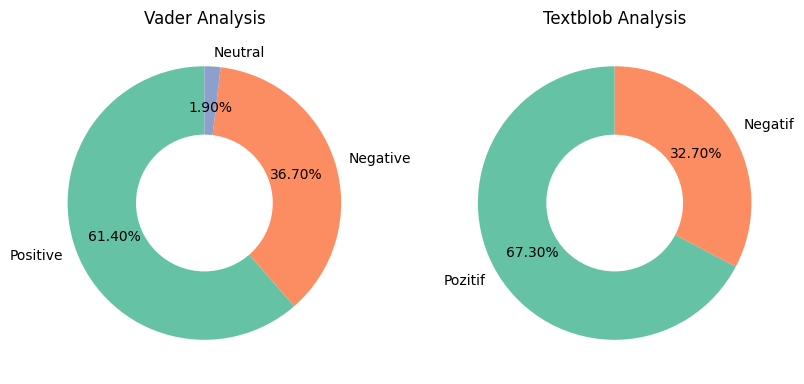

In [35]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,1)
plt.title("Vader Analysis")
plt.pie(analysis.values, labels = analysis.index, autopct='%1.2f%%', 
        colors=sns.color_palette('Set2'), startangle=90, pctdistance=0.70,
        shadow=False)

hole = plt.Circle((0, 0), 0.50, facecolor='white')
plt.gcf().gca().add_artist(hole)


plt.subplot(1,3,2)
plt.title("Textblob Analysis")
plt.pie(analysis_t.values, labels = analysis_t.index, autopct='%1.2f%%', 
         colors=sns.color_palette('Set2'), startangle=90, pctdistance=0.70,
        shadow=False)

hole = plt.Circle((0, 0), 0.50, facecolor='white')
plt.gcf().gca().add_artist(hole)

**Data Visulation**

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

<Figure size 1500x800 with 0 Axes>

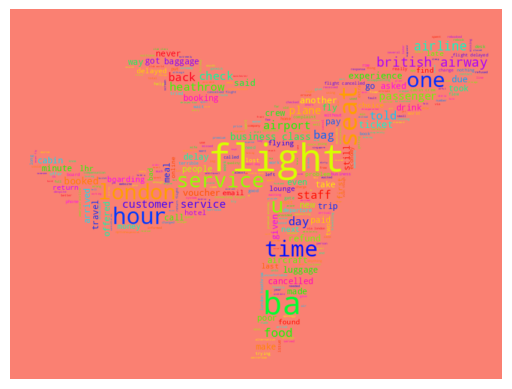

In [53]:
#word cloud
stopwords = set(STOPWORDS)

mask=np.array(Image.open('airplane.png'))
mask=np.where(mask > 3, 255, mask)

text=" ".join(cat for cat in df.lemma)

wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="salmon", colormap='gist_rainbow',max_words=1000, mask=mask).generate(text)

plt.figure(figsize=(15,8))
plt.figure()

plt.imshow(wordcloud, interpolation="bilinear")
plt.savefig("airplanenew.png", format="png") 
plt.axis("off")
plt.show()

In [38]:
import itertools
import collections

In [39]:
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return tokens
   
df['token'] = df.apply(lambda x: tokenize(x['lemma']), axis=1)

# List of all words across tweets
all_words = list(itertools.chain(*df.token))

# Create counter
counts = collections.Counter(all_words)
counts.most_common(25)

[('flight', 2043),
 ('ba', 1192),
 ('seat', 948),
 ('service', 755),
 ('london', 640),
 ('time', 601),
 ('hour', 522),
 ('crew', 499),
 ('food', 496),
 ('good', 450),
 ('cabin', 424),
 ('one', 424),
 ('class', 421),
 ('staff', 412),
 ('airline', 406),
 ('british', 383),
 ('airway', 382),
 ('business', 378),
 ('would', 372),
 ('check', 358),
 ('u', 354),
 ('get', 348),
 ('heathrow', 328),
 ('customer', 300),
 ('day', 288)]

In [40]:
common_word = pd.DataFrame(counts.most_common(25),
                           columns=['words', 'count'])
common_word.head()

,words,count
0,flight,2043
1,ba,1192
2,seat,948
3,service,755
4,london,640


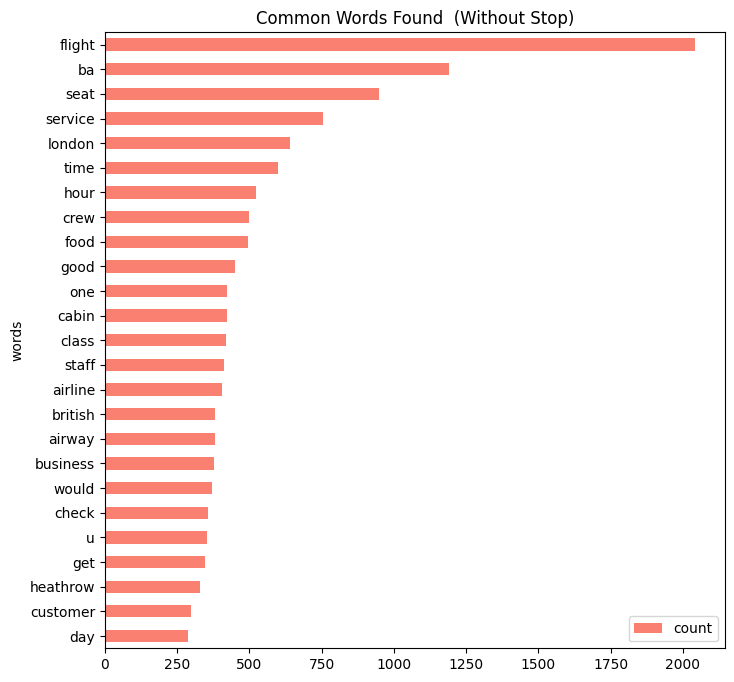

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
common_word.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="salmon")

ax.set_title("Common Words Found  (Without Stop)")

plt.show()

In [42]:
#from nltk import bigrams, FreqDist
from nltk.probability import FreqDist
from nltk.corpus import brown

In [43]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [44]:
#words_ne=[]
#for word in df.token:
#        words_ne.append(tuple(word))


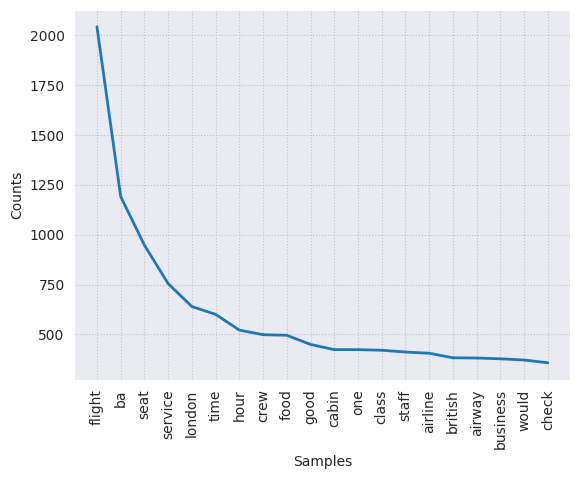

<Axes: xlabel='Samples', ylabel='Counts'>

In [45]:
#word frequency
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
nlp_words=nltk.FreqDist(counts)
nlp_words.plot(20)

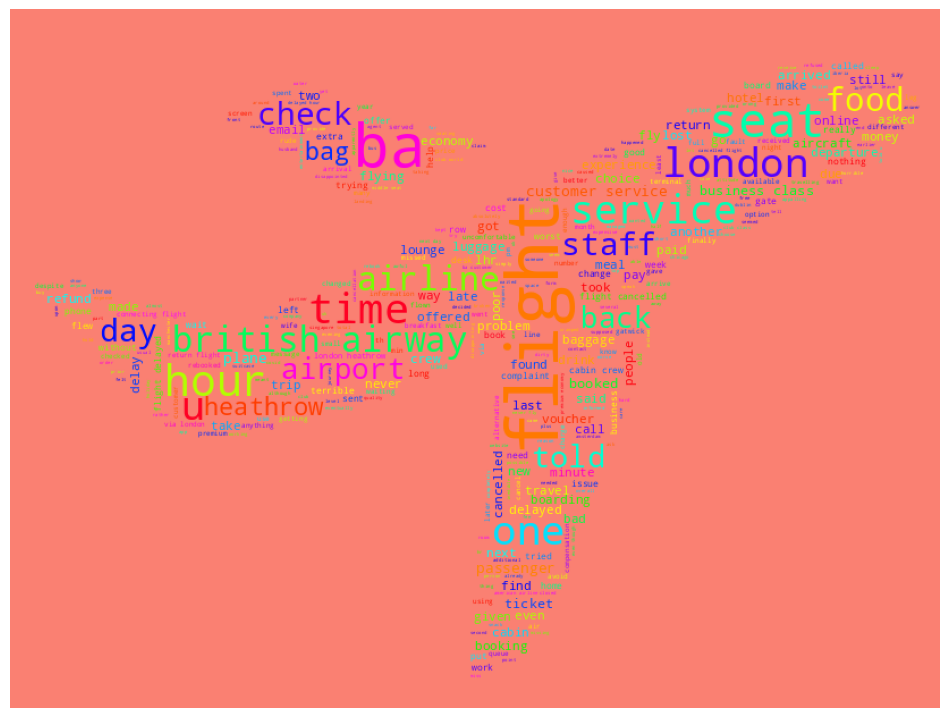

In [46]:
#Word Cloud for negative mood
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

df=df[df['vader_analysis']=='Negative'] 

# join tweets to a single string
text=" ".join(cat for cat in df.lemma)


mask=np.array(Image.open('airplane.png'))
mask=np.where(mask > 3, 255, mask)

text=" ".join(cat for cat in df.lemma)

wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="salmon", 
                      colormap='gist_rainbow',max_words=1000, mask=mask).generate(text)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

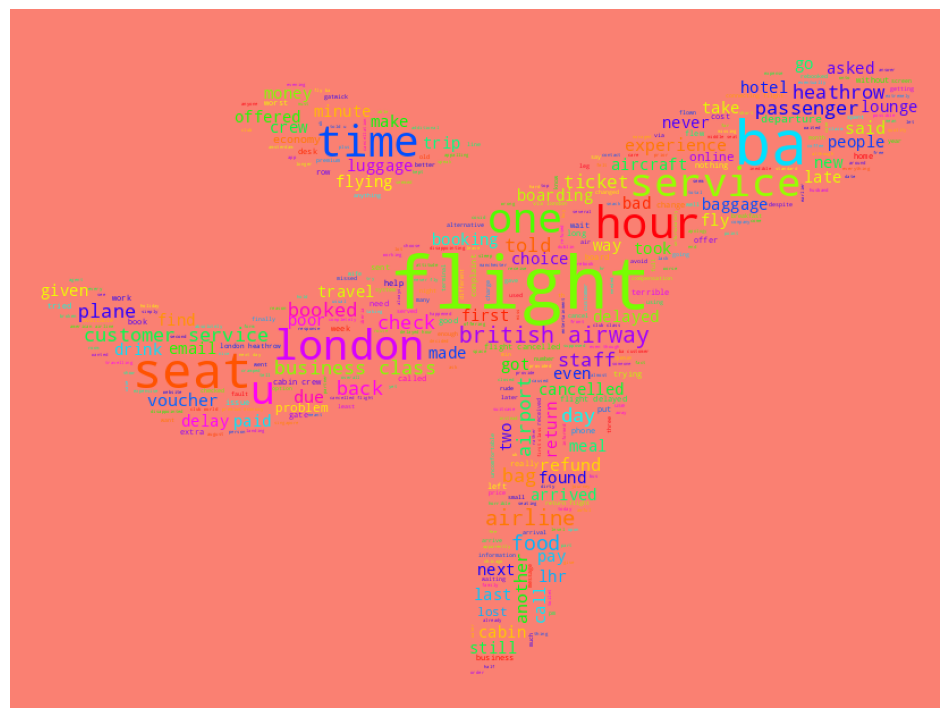

In [47]:
#Word Cloud for positive mood
stopwords = set(STOPWORDS)

df1=df[df['vader_analysis']=='Positive'] 

# join tweets to a single string
text=" ".join(cat for cat in df.lemma)


mask=np.array(Image.open('airplane.png'))
mask=np.where(mask > 3, 255, mask)

text=" ".join(cat for cat in df.lemma)

wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="salmon", 
                      colormap='gist_rainbow',max_words=1000, mask=mask).generate(text)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

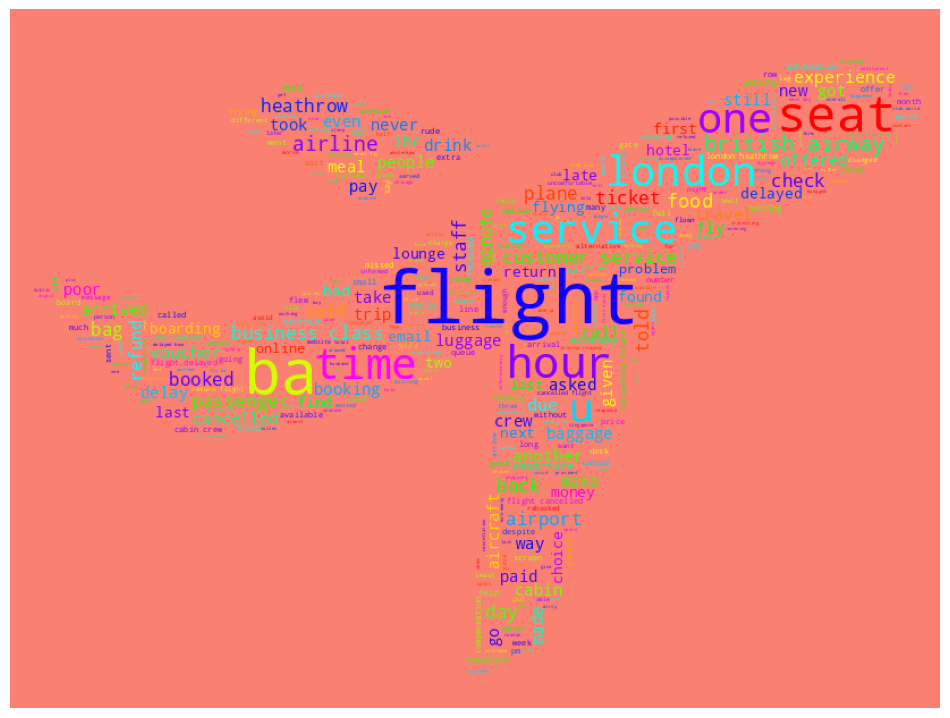

In [48]:
#Word Cloud for neutral mood
stopwords = set(STOPWORDS)

df2=df[df['vader_analysis']=='Neutral'] 

# join tweets to a single string
text=" ".join(cat for cat in df.lemma)


mask=np.array(Image.open('airplane.png'))
mask=np.where(mask > 3, 255, mask)

text=" ".join(cat for cat in df.lemma)

wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="salmon", 
                      colormap='gist_rainbow',max_words=1000, mask=mask).generate(text)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()